# KNN

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
# Data Preparation

from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=1000,
    n_features=3,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False)

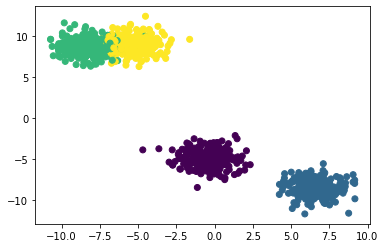

In [139]:
plt.scatter(X[:,0],X[:,1],c=y)

### Deciding number of clusters to make

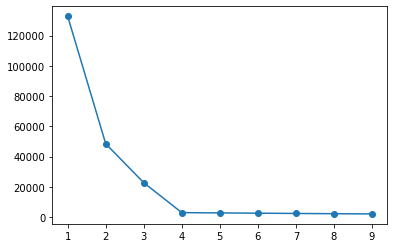

In [176]:

from sklearn.cluster import KMeans

cluster=list(range(1,10))
SSE=[]

for i in (cluster):
    model=KMeans(n_clusters=i)
    model.fit(X)
    sse=model.inertia_
    SSE.append(sse)
plt.scatter(cluster,SSE)
plt.plot(cluster,SSE)

### K-Nearest Neighbour

In [148]:

def distance(X1,X2):
    return np.sqrt(sum((X1-X2)**2))

class K_Mean:
    
    def __init__(self,K=None,max_iter=10000,plot_steps=False):
        self.k=K
        self.max_iter=max_iter
        self.plot_steps=plot_steps
        
        # creating empty clusters
        self.clusters=[[] for _ in range(self.k)]
        
        #creatig centroid
        self.centroid=[]
    def fit(self,X):
        self.X=X
        self.no_of_samples,self.no_of_features=X.shape
        # Initialize centroid
        indx=np.random.choice(self.no_of_samples,self.k,replace=False)
        self.centroid=[self.X[ind] for ind in indx]
        #optimization
        for i in range(self.max_iter):
            #update cluster
            self.clusters=self.create_cluster(self.centroid)
            if self.plot_steps:
                self.plot()
            #update centroid
            old_centroid=self.centroid
            self.centroid=self.get_centroid(self.clusters)
            if self.plot_steps:
                self.plot()
            #check if converged
            if self.isconverged(old_centroid,self.centroid):
                print("K-Nearest Neighbour()")
                break
        
        return self.get_lables(self.clusters)
    def create_cluster(self,centroid):
        clusters=[[] for _ in range(self.k)]
        for ind,sample in enumerate (self.X):
            closest_centroid_ind=self.closest_centroid(sample,centroid)
            clusters[closest_centroid_ind].append(ind)
        return clusters

    def closest_centroid(self,sample,centroid):
        centroid_distance=[distance(sample,point) for point in self.centroid]
        closest_ind=np.argmin(centroid_distance)
        return closest_ind

    def get_centroid(self,clusters):
        centroid=np.zeros((self.k,self.no_of_features))
        for clu_ind, cluster in enumerate(clusters):
            cluster_mean=np.mean(self.X[cluster],axis=0)
            centroid[clu_ind]=cluster_mean
        return centroid
    def isconverged(self,old_centroid,new):
        change=[distance(old_centroid[i],new[i]) for i in range(self.k)]
        return sum(change)==0
    def get_lables(self,clusters):
        
        lables=np.empty(self.no_of_samples)
        for cluster_ind,cluster in enumerate(clusters):
            for sample_ind in cluster:
                lables[sample_ind]=cluster_ind
        return lables

    def plot(self):
        fig,ax=plt.subplots(figsize=(12,8))
        for i,ind in enumerate(self.clusters):
            points=self.X[ind].T
            ax.scatter(*points)
        for points in self.centroid:
            ax.scatter(*points, marker="*", linewidth=2)

        plt.show()

In [149]:
# Training the model

model=K_Mean(K=4)

In [150]:
# Making clustering

predicted=model.fit(X)

K-Nearest Neighbour()


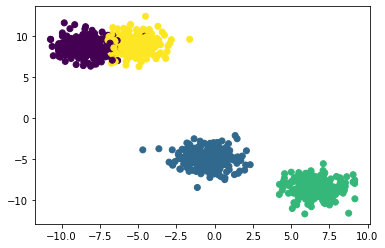

In [144]:
# Ploting the cluster

plt.scatter(X[:,0],X[:,1],c=predicted)

# Comparing with Sklearn model

In [178]:
from sklearn.cluster import KMeans

In [179]:
cluster = KMeans(4)

In [180]:
cluster.fit(X)

KMeans(n_clusters=4)

In [183]:
predicted=cluster.labels_

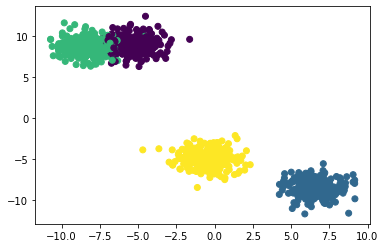

In [184]:
# Ploting the cluster

plt.scatter(X[:,0],X[:,1],c=predicted)